In [27]:
# Loading important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve
from scikitplot.metrics import plot_lift_curve
from scikitplot.metrics import plot_roc

# Loading the training data

In [28]:
def getting_data_ready():

    # for loading all the data
    df = pd.read_csv('scaled_datatrainingcopy.csv')
    df_test1 = pd.read_csv('scaled_datatestcopy.csv')
    df_test2 = pd.read_csv('scaled_datatest2copy.csv')

    class_name = "Occupancy"

    attributes = [col for col in df.columns if col != class_name]
    X = df[attributes].values
    y = df[class_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

    attributes = [col for col in df.columns if col != class_name]
    X_test1 = df_test1[attributes].values
    y_test1 = df_test1[class_name]


    attributes = [col for col in df.columns if col != class_name]
    X_test2 = df_test2[attributes].values
    y_test2 = df_test2[class_name]
    
    
    return X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2

In [29]:
X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2 = getting_data_ready()

# this is list to be used in testing automation

tests = [(X_test,y_test),(X_test1,y_test1),
         (X_test2,y_test2)]




# copy the above cells in every sheet

##### Data Partitioning

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# k Nearest Neighbor n = 5

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Here I am trying to search for best k using RandomizedSearchCV

In [33]:
from sklearn.model_selection import RandomizedSearchCV

### here we are doing a seach form the best values 

In [43]:
param_list = {'n_neighbors': list(np.arange(2, 200)),
              'weights': ['uniform', 'distance'],
             }

clf = KNeighborsClassifier()

In [44]:
random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=200, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9934506753990995
F1-score [0.99584416 0.98455598]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [46]:
random_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### I am seeing all the results

In [47]:
def show_report(tests):
    for test, results in tests:

        y_pred = clf.predict(test)
        print('\n ===============Results for ================== \n')
        print('Accuracy %s' % accuracy_score(results, y_pred))
        print('F1-score %s' % f1_score(results, y_pred, average=None))
        print(classification_report(results, y_pred))
        y_score = clf.predict_proba(test)
        plot_roc(results, y_score)
        plot_lift_curve(results, y_score)

        plt.show()


 ===============Results for ================== 

Accuracy 0.9934506753990995
F1-score [0.99584416 0.98455598]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



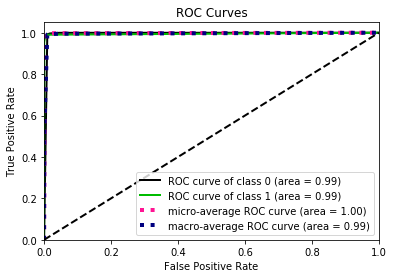

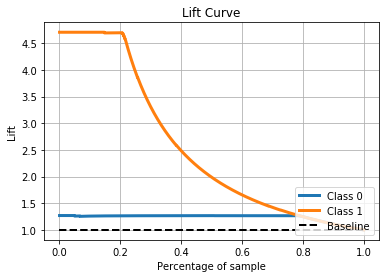


 ===============Results for ================== 

Accuracy 0.9467166979362102
F1-score [0.95867288 0.9250264 ]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1693
           1       0.95      0.90      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.94      2665
weighted avg       0.95      0.95      0.95      2665



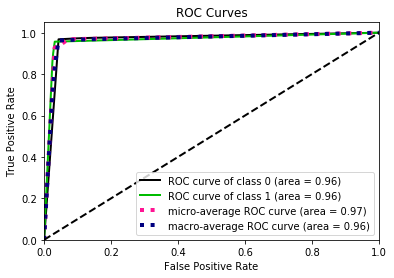

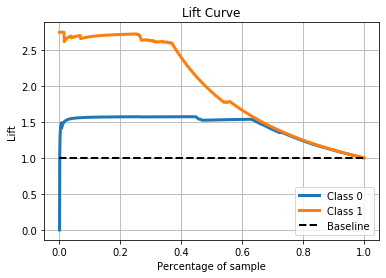


 ===============Results for ================== 

Accuracy 0.9837981952420016
F1-score [0.98972157 0.96176186]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.95      0.97      0.96      2049

    accuracy                           0.98      9752
   macro avg       0.97      0.98      0.98      9752
weighted avg       0.98      0.98      0.98      9752



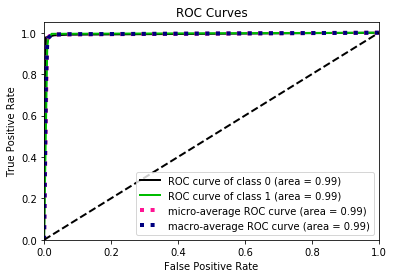

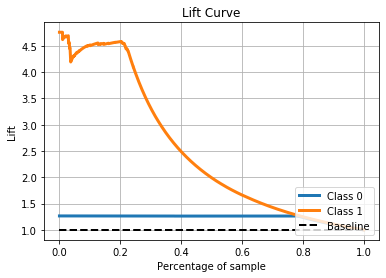

In [48]:
show_report(tests)

In [41]:
tests = [(X_test,y_test),(X_test1,y_test1),
         (X_test2,y_test2)]

df_report = pd.DataFrame()

for test, results in tests:
    
    y_pred = clf.predict(test)
    print('Accuracy %s' % accuracy_score(results, y_pred))
    results = pd.DataFrame(classification_report(results, y_pred, output_dict=True))
    print(results.T)
    df_report = pd.concat([df_report, results.T], axis=1 )

Accuracy 0.9926320098239869
              precision    recall  f1-score      support
0              0.994808  0.995842  0.995325  1924.000000
1              0.984526  0.980732  0.982625   519.000000
accuracy       0.992632  0.992632  0.992632     0.992632
macro avg      0.989667  0.988287  0.988975  2443.000000
weighted avg   0.992624  0.992632  0.992627  2443.000000
Accuracy 0.9594746716697936
              precision    recall  f1-score      support
0              0.967001  0.969285  0.968142  1693.000000
1              0.946281  0.942387  0.944330   972.000000
accuracy       0.959475  0.959475  0.959475     0.959475
macro avg      0.956641  0.955836  0.956236  2665.000000
weighted avg   0.959444  0.959475  0.959457  2665.000000
Accuracy 0.9845159967186218
              precision    recall  f1-score      support
0              0.993079  0.987278  0.990170  7703.000000
1              0.953200  0.974134  0.963553  2049.000000
accuracy       0.984516  0.984516  0.984516     0.984516
macr

In [42]:
df_report.drop(['support'], axis=1, inplace=True)
df_report.drop(['macro avg','weighted avg'], axis=0,inplace=True)
df_report.to_excel('/Users/piyush2017/Downloads/res.xlsx')

FileCreateError: [Errno 2] No such file or directory: '/Users/piyush2017/Downloads/res.xlsx'